<a href="https://colab.research.google.com/github/TXH2020/MainRepo/blob/main/Online%20Courses/Data%20Analytics%20With%20Python/Program9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multiple Regression:
###In this model, we observe the effect several independent variables on a single dependent variable. The multiple regression equation is described as follows:
###y=B0+B1x1+B2x2+B3x3+......+Bpxp
###where x1,x2,x3....,xp are the independent variables.
###B0,B1,B2....Bp are called weights of the respective independent variables.
###Let us examine a problem in multiple regression.(From "Statistics for Business and Economics" by Anderson)
###Butler Trucking Company is an independent trucking company in southern California.A major portion of Butler’s business involves deliveries throughout its local area. To develop better work schedules, the managers want to estimate the total daily travel time for their drivers. Initially the managers believed that the total daily travel time would be closely related to the number of miles traveled in making the daily deliveries. A simple random sample of 10 driving assignments is provided the data shown in Table 15.1
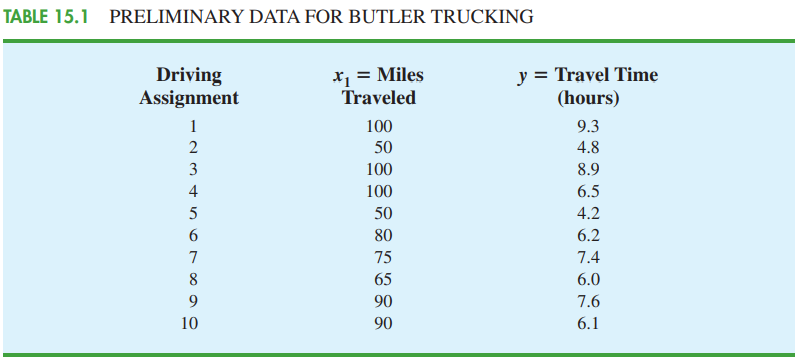


In [ ]:
#Let us prepare a linear regression model of y on x1
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Data_Analytics_Python/Truck.csv')
df

,Driving Assignment,Miles_travelled,Number_of_Deliveries,Travel_Time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


In [ ]:
import statsmodels.api as s
x=df['Miles_travelled']
y=df['Travel_Time']
x=s.add_constant(x)
model=s.OLS(y,x).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel_Time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Fri, 22 Sep 2023   Prob (F-statistic):            0.00408
Time:                        11:12:00   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2739      1.401      0.909      0.390      -1.956       4.504
Miles_travelled     0.0678      0.017      3.977      0.004       0.028       0.107
==============================================================================
Omnibus:                        0.694   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.623
Skew:                          -0.333   Prob(JB):                        0.732
Kurtosis:                       1.974   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###From the above model we get that the travel time(y) depends on Miles Travelled(x1) as:
###y=1.2739+0.0678x1
###We also find that the r^2 value is 0.664 i.e. 66.4 % of the model variation can be explained with the help of x1.
###This finding is fairly good, but the managers might want to consider adding a second independent variable to explain some of the remaining variability in the dependent variable.
###In attempting to identify another independent variable, the managers felt that the number of deliveries could also contribute to the total travel time. The Butler Trucking data, with the number of deliveries added, are shown in Table 15.2.
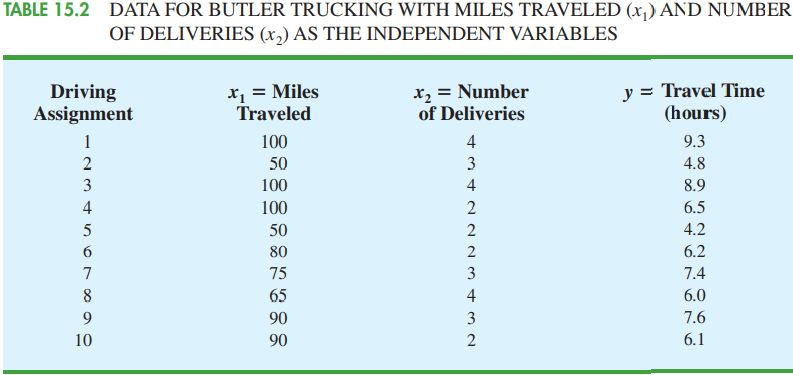

In [ ]:
#Now let us consider another model of y on both x1 and x2(No. of Deliveries)
import statsmodels.formula.api as sfa
model1=sfa.ols(formula="Travel_Time~Miles_travelled+Number_of_Deliveries",data=df).fit()
model1.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel_Time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           0.000276
Time:                        11:12:00   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.8687      0.952     -0.913      0.392      -3.119       1.381
Miles_travelled          0.0611      0.010      6.182      0.000       0.038       0.085
Number_of_Deliveries     0.9234      0.221      4.176      0.004       0.401       1.446
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.151
Skew:                           0.074   Prob(JB):                        0.927
Kurtosis:                       2.418   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###The model obtained above is a multiple regression model whose equation is as follows:
###y=-0.8687+0.0611x1+0.9234x2

##Regression Approach to Anova
###Let us consider the following problem:
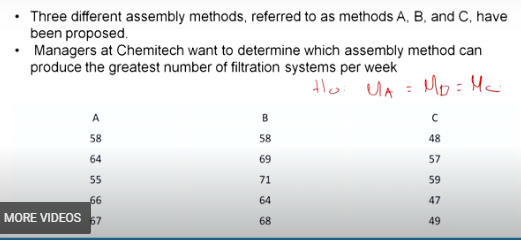


###To represent each of the assembly method, we create dummy variables A,B such that:
###A=1 B=0 represents method A
###A=0 B=1 represents method B
###A=0 B=0 represents method C
###Then we prepare a Multiple Regression Model on the variables A,B. When we view the model summary we can get the p value for the F test statistic. This is the same as that obtained from ANOVA.

In [ ]:
df1=pd.read_csv("https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Data_Analytics_Python/RegAnova.csv")
df1

,A,B,C
0,58,58,48
1,64,69,57
2,55,71,59
3,66,64,47
4,67,68,49


In [ ]:
#Normal annova approach
df1_m=pd.melt(df1.reset_index(),id_vars=['index'],value_vars=['A','B','C'])
df1_m.columns=['index','treatments','value']
model2=sfa.ols('value~C(treatments)',data=df1_m).fit()
import statsmodels.api as sa
t=sa.stats.anova_lm(model2,typ=1)
t

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,520.0,260.000000,9.176471,0.003818
Residual,12.0,340.0,28.333333,NaN,NaN


In [ ]:
#Using dummy variable approach
get_dummies=pd.get_dummies(df1_m['treatments'])
get_dummies

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [ ]:
df2=pd.concat([df1_m,get_dummies],axis=1)
df2.drop(['C','treatments'],inplace=True,axis=1)
df2

,index,value,A,B
0,0,58,1,0
1,1,64,1,0
2,2,55,1,0
3,3,66,1,0
4,4,67,1,0
5,0,58,0,1
6,1,69,0,1
7,2,71,0,1
8,3,64,0,1
9,4,68,0,1


In [ ]:
model2=sfa.ols(formula="value~A+B",data=df2).fit()
model2.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     9.176
Date:                Fri, 22 Sep 2023   Prob (F-statistic):            0.00382
Time:                        11:12:00   Log-Likelihood:                -44.691
No. Observations:                  15   AIC:                             95.38
Df Residuals:                      12   BIC:                             97.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.0000      2.380     21.844      0.000      46.813      57.187
A             10.0000      3.367      2.970      0.012       2.665      17.335
B             14.0000      3.367      4.159      0.001       6.665      21.335
==============================================================================
Omnibus:                        3.780   Durbin-Watson:                   2.550
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.311
Skew:                          -0.196   Prob(JB):                        0.519
Kurtosis:                       1.606   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""